In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# datasets = ['fungi', 'mscoco', 'wikiart_artist']
dataset = 'fungi'
targets = ['full', 'bias', 'qkv_bias', 'even_qkv_bias', 'q_bias', 'even_q_bias']

lr = 0.05
noise = 0.2

src_path = f"outputs/ft_trajs_{target}_train_40steps_{lr}lr_5seeds_{noise}noise"

In [31]:
def plot_task_loss(dataset, target, lr, noise):
    plt.figure(figsize=(14,14))
    src_path = f"outputs/ft_trajs_{target}_train_40steps_{lr}lr_5seeds_{noise}noise/{dataset}"
    file_names = sorted(list(filter(lambda fn: 'loss' in fn, os.listdir(src_path))))
    x = np.arange(0, 40)
    for i, file_name in enumerate(file_names):
        datas = np.load(os.path.join(src_path, file_name))
        plt.subplot(3, 2, i+1)
        for i in range(datas.shape[0]):
            plt.plot(x, datas[i])
    
    plt.show()

In [32]:
def plot_task_acc(dataset, target, lr, noise):
    plt.figure(figsize=(14,14))
    src_path = f"outputs/ft_trajs_{target}_train_40steps_{lr}lr_5seeds_{noise}noise/{dataset}"
    file_names = sorted(list(filter(lambda fn: 'acc' in fn, os.listdir(src_path))))
    x = np.arange(0, 40)
    for i, file_name in enumerate(file_names):
        datas = np.load(os.path.join(src_path, file_name))
        plt.subplot(3, 2, i+1)
        for i in range(datas.shape[0]):
            plt.plot(x, datas[i])
    
    plt.show()

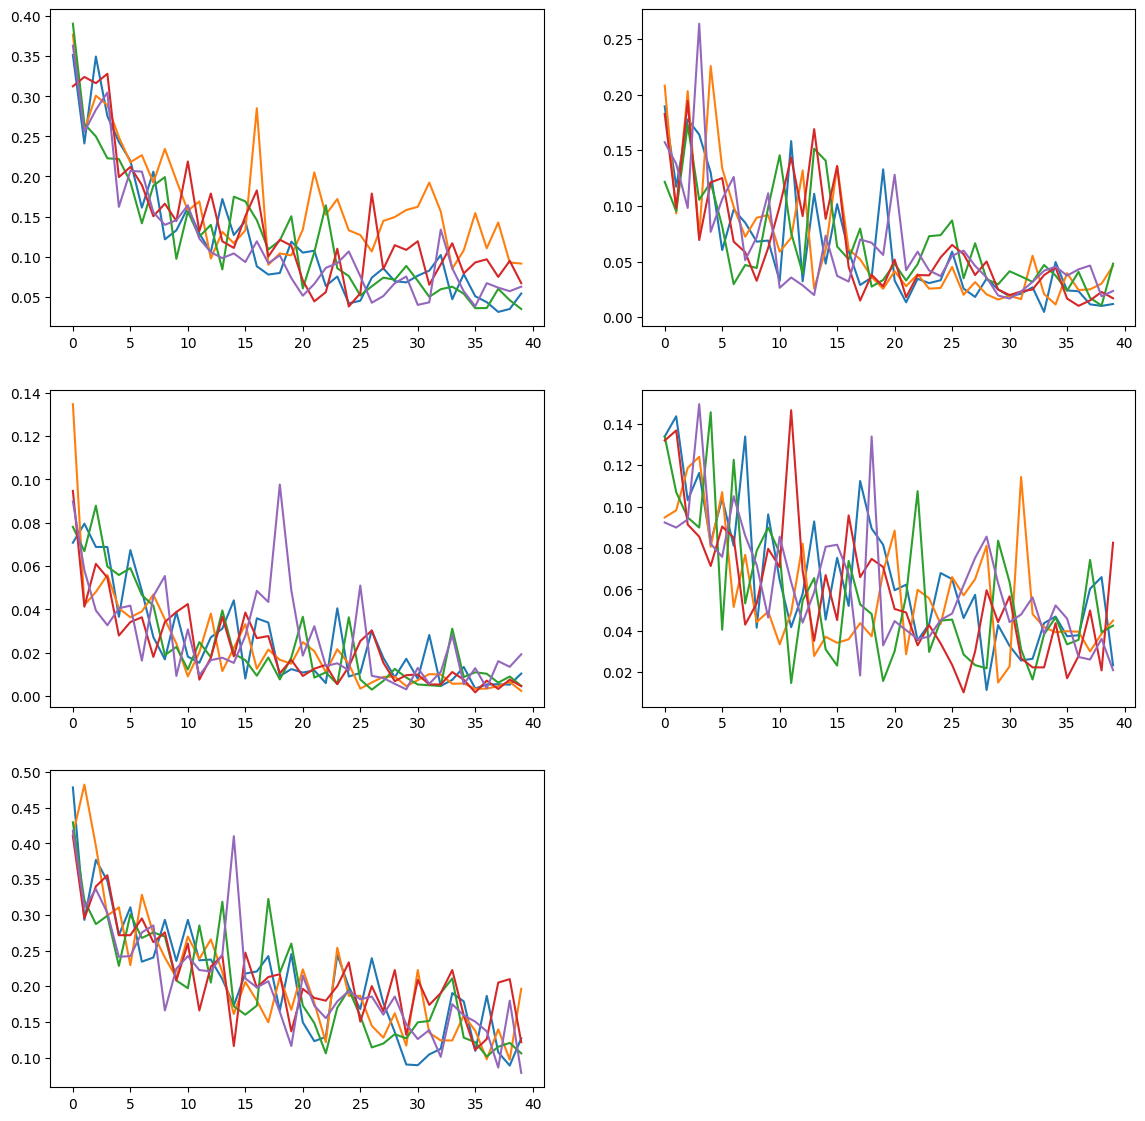

In [29]:
plot_task_loss('fungi', 'even_qkv_bias', 0.05, 0.2)

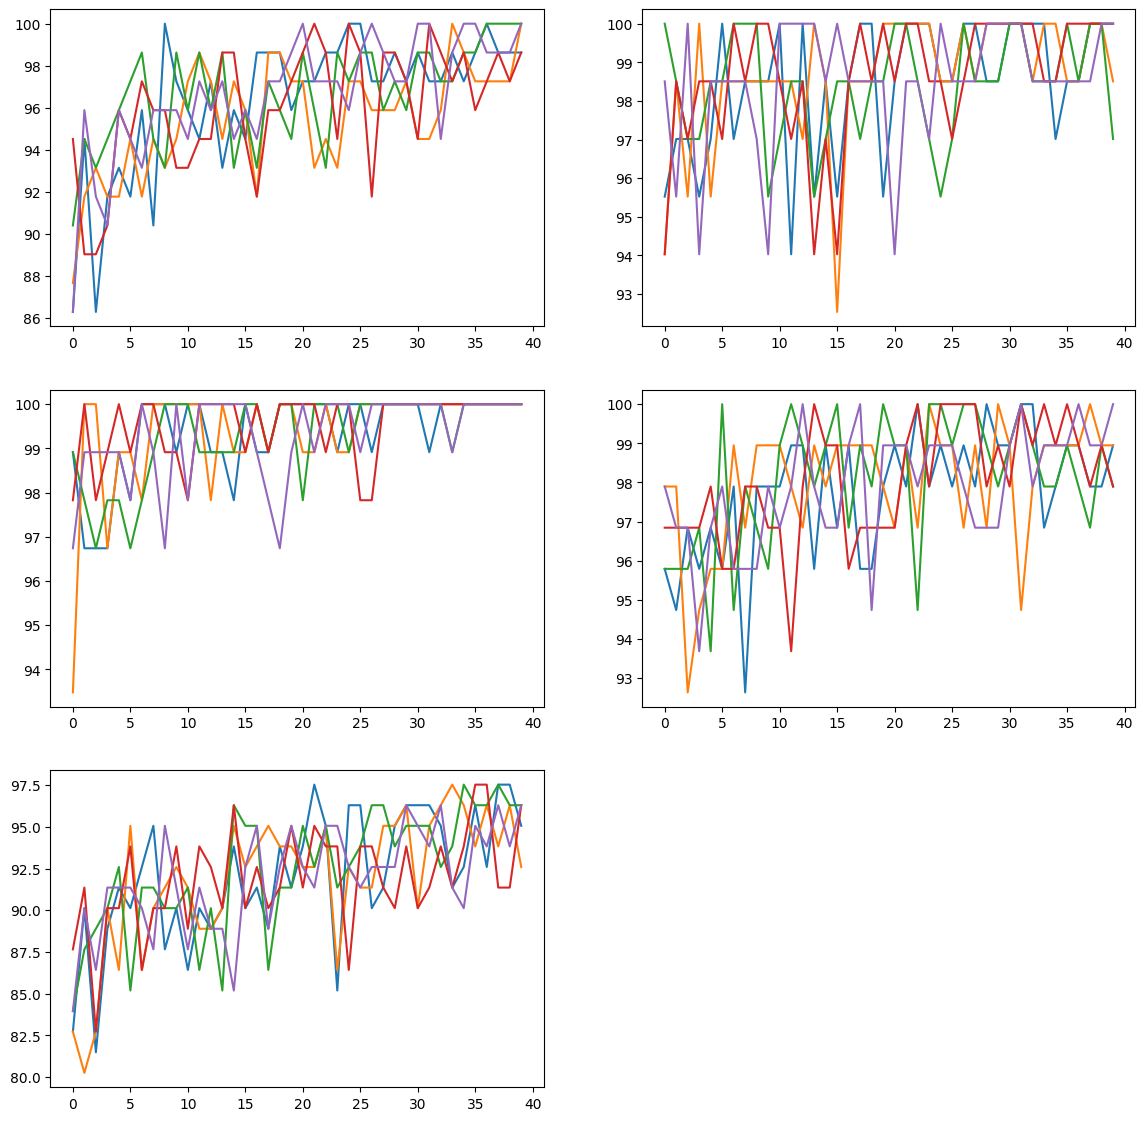

In [33]:
plot_task_acc('fungi', 'even_qkv_bias', 0.05, 0.2)

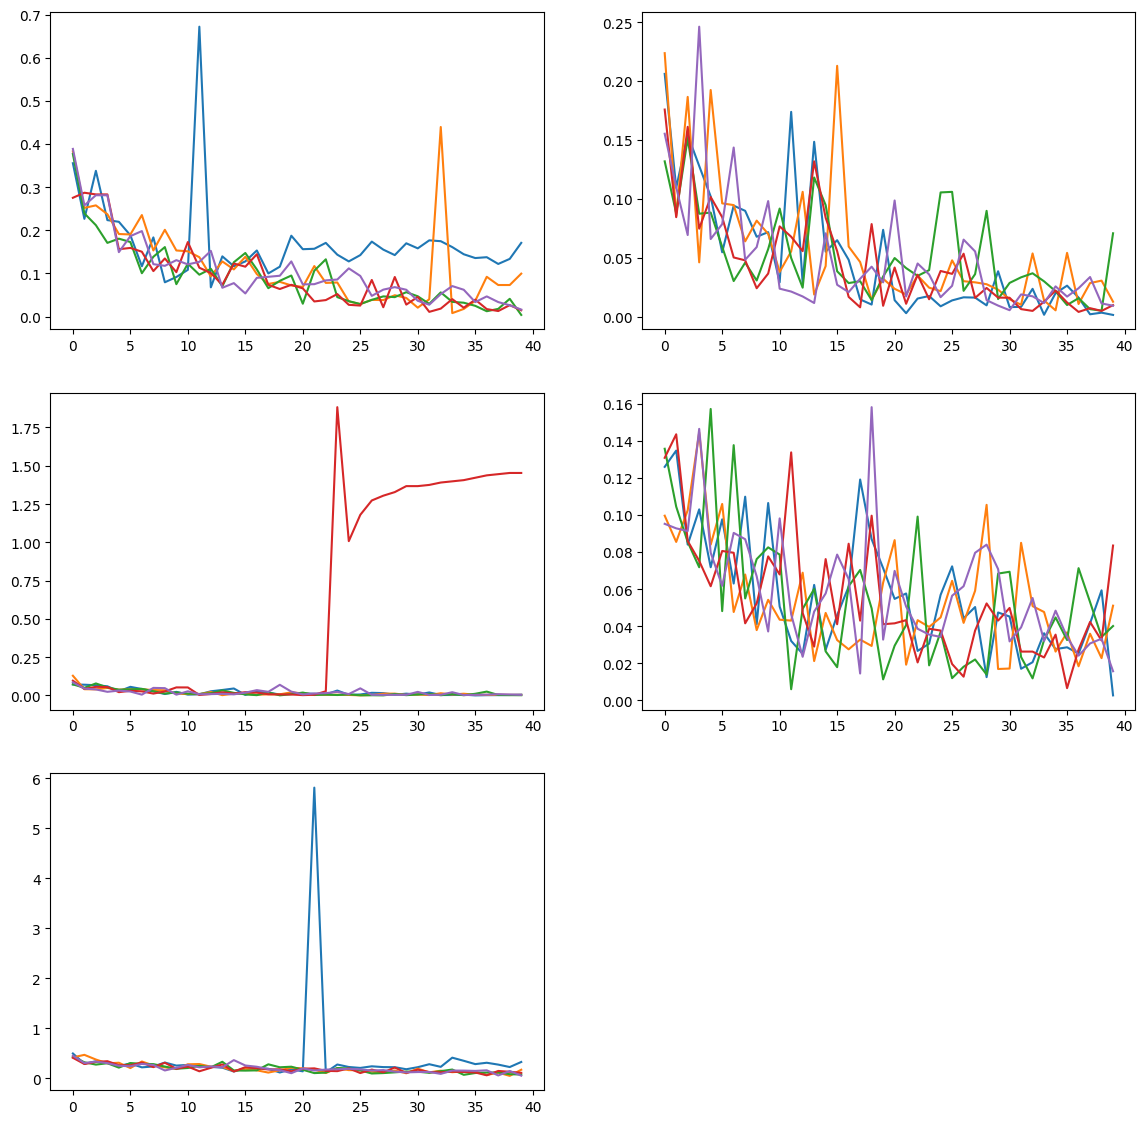

In [34]:
plot_task_loss('fungi', 'qkv_bias', 0.05, 0.2)

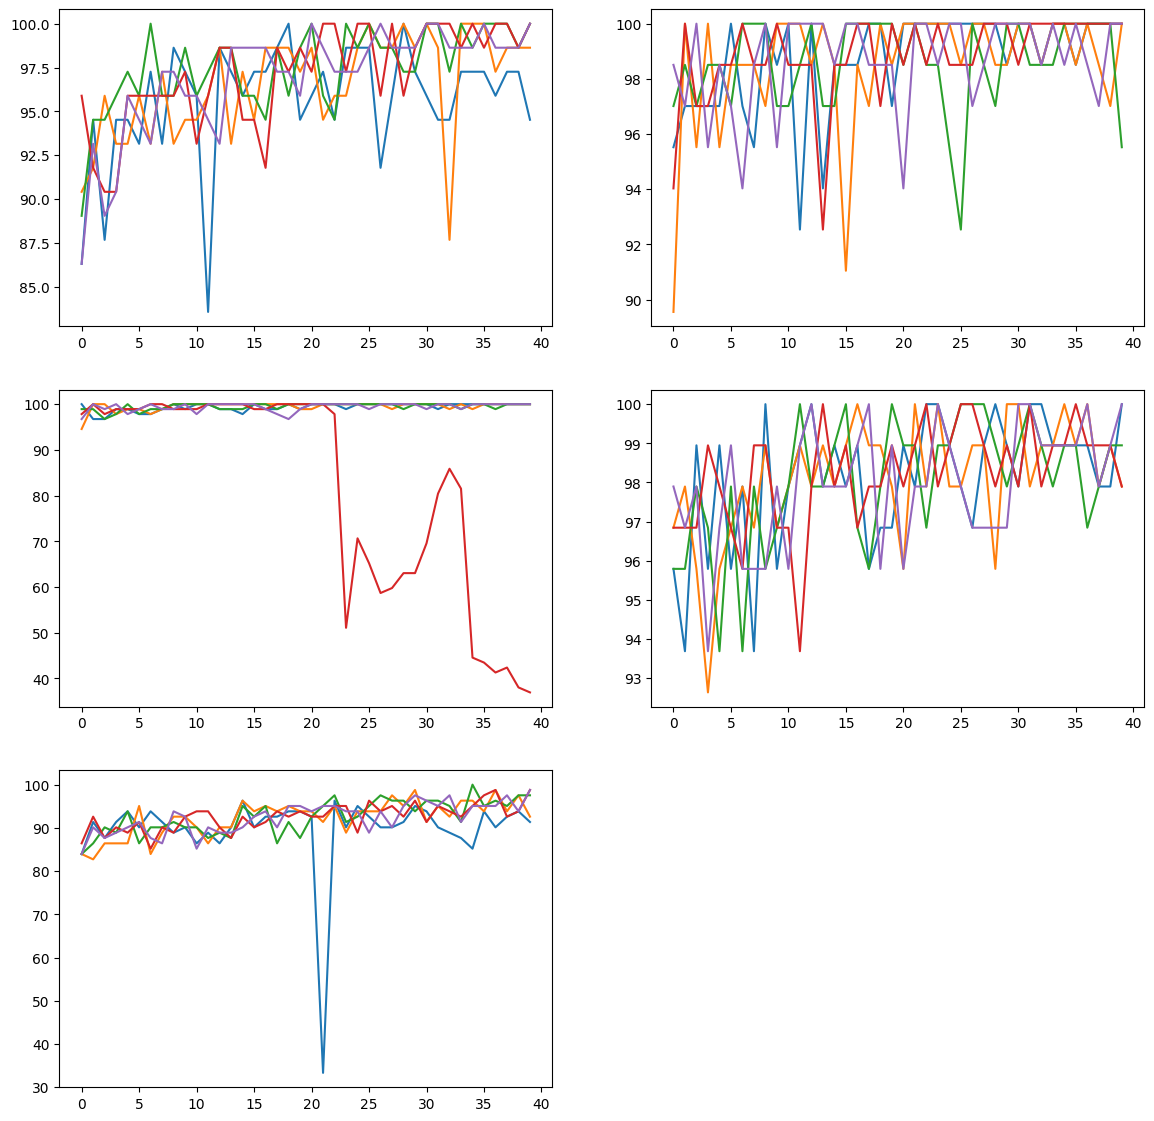

In [35]:
plot_task_acc('fungi', 'qkv_bias', 0.05, 0.2)

In [ ]:
def plot_loss_per_lr(dataset):
    plt.figure(figsize=(14, 500))

    for i, target in enumerate(targets):
        src_path = f"outputs/ft_trajs_{target}_train_lr_searching"
        path = os.path.join(src_path, dataset)
        file_names = sorted(list(filter(lambda fn: 'loss' in fn, os.listdir(path))))

        for k, file_name in enumerate(file_names):
            datas = np.load(os.path.join(path, file_name))
            datas = datas.squeeze(0)
            for j in range(datas.shape[0]):
                plt.subplot(16*8,5,40*i+5*k+j+1)
                plt.xlim(-1, 20)
                # plt.ylim(0, 0.5)
                plt.title(f"{target}_{file_name}_{j}")
                data = datas[j]
                x = np.arange(0, 20)
                plt.plot(x, data)
    plt.show()
    